## Regression Prediction

## Import the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from pivottablejs import pivot_ui
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
cars = pd.read_csv("data/Kia_Data2.csv", na_values="?").dropna()

In [3]:
# print the first five lines
cars.head()

,auction_code,car_year,color,make,model,subseries,body,engine,transmission,mileage,condition_grade,times_run,sold_date,seller,sale_price
0,LMAA,2017,BLUE,KIA,SOUL,+,5WGN,1G,A,21872,SL,2,2018-01-23-00.00.00.000000,4915715,7600
1,NVAA,2014,SILVER,KIA,FORTE,LX,4DSN,2G,A,60830,36,1,2018-03-09-00.00.00.000000,4918692,6800
2,GCAA,2011,MAROON,KIA,SORENTO FWD 4C,EX,SUV,4CY,A,54248,39,1,2017-02-09-00.00.00.000000,5161248,10800
3,DALA,2013,WHITE,KIA,OPTIMA,LX,SEDA,4CY,A,110459,32,3,2019-06-26-00.00.00.000000,4996444,6805
4,SLAA,2014,SILVER,KIA,RIO,LX,SEDA,4CY,A,54362,SL,1,2019-06-24-00.00.00.000000,4999444,1605


In [4]:
# list basic info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71228 entries, 0 to 71230
Data columns (total 15 columns):
auction_code       71228 non-null object
car_year           71228 non-null int64
color              71228 non-null object
make               71228 non-null object
model              71228 non-null object
subseries          71228 non-null object
body               71228 non-null object
engine             71228 non-null object
transmission       71228 non-null object
mileage            71228 non-null int64
condition_grade    71228 non-null object
times_run          71228 non-null int64
sold_date          71228 non-null object
seller             71228 non-null int64
sale_price         71228 non-null int64
dtypes: int64(5), object(10)
memory usage: 8.7+ MB


In [5]:
# Find all the unique condition grades.
print(cars["condition_grade"].unique())

# Replace all the occurences of codes with the corresponding numbers.
cars.loc[cars["condition_grade"] == "AV", "condition_grade"] = '30'
cars.loc[cars["condition_grade"] == "SL", "condition_grade"] = '0'
cars.loc[cars["condition_grade"] == "CL", "condition_grade"] = '40'
cars.loc[cars["condition_grade"] == "EC", "condition_grade"] = '50'
cars.loc[cars["condition_grade"] == "PR", "condition_grade"] = '10'
cars.loc[cars["condition_grade"] == "RG", "condition_grade"] = '20'

['SL' '36' '39' '32' '48' '40' '42' '44' '13' '43' '35' '46' '33' '24'
 '50' 'PR' '15' '23' '19' 'RG' '27' '14' '26' '17' '18' '16' '20' '21'
 '22' '29' '0' '30' '28' 'AV' '31' '25' '38' '37' '34' '45' '41' '12' '11'
 'CL' '10' '1' '47' '49' 'EC']


In [6]:
print(cars["condition_grade"].unique())

['0' '36' '39' '32' '48' '40' '42' '44' '13' '43' '35' '46' '33' '24' '50'
 '10' '15' '23' '19' '20' '27' '14' '26' '17' '18' '16' '21' '22' '29'
 '30' '28' '31' '25' '38' '37' '34' '45' '41' '12' '11' '1' '47' '49']


In [7]:
print(cars["transmission"].unique())
cars.loc[cars['transmission'] == 'M', 'transmission'] = 1
cars.loc[cars['transmission'] == 'A', 'transmission'] = 0
cars.loc[cars['transmission'] == '5', 'transmission'] = 0
cars.loc[cars['transmission'] == '6', 'transmission'] = 0
cars.loc[cars['transmission'] == 'O', 'transmission'] = 0
cars.loc[cars['transmission'] == 'P', 'transmission'] = 0
cars.loc[cars['transmission'] == 'Z', 'transmission'] = 0
cars.loc[cars['transmission'] == 'C', 'transmission'] = 0
cars.loc[cars['transmission'] == 'N', 'transmission'] = 0

['A' '5' 'O' '6' 'M' 'P' 'C' 'Z' 'N']


In [8]:
print(cars["transmission"].unique())

[0 1]


In [9]:
print(cars["model"].unique())

['SOUL' 'FORTE' 'SORENTO FWD 4C' 'OPTIMA' 'RIO' 'SPORTAGE AWD 4C'
 'SPORTAGE FWD 4C' 'SEPHIA' 'SPORTAGE' 'SPORTAGE 4X4' 'SPORTAGE 4X2'
 'OPTIMA 4C' 'SPECTRA' 'SPORTAGE 4X4 4C' 'RONDO FWD 4C' 'SPORTAGE 4X2 4C'
 'RONDO 4C' 'SPECTRA5' 'SORENTO AWD 4C' 'SORENTO' 'FORTE - EX L'
 'SORENTO 4C' 'RONDO' 'FORTE LX+MT' 'SORENTO AWD' 'SPORTAGE FWD'
 'SORENTO FWD' 'RIO 5' 'FORTE EX AT' 'RIO LX' 'SPORTAGE LX FWD'
 'RIO LX + MT' 'QUINTO' 'FORTE LX +' 'FORTE 5' 'SOUL EX+'
 'SPORTAGE     4C' 'SOUL EX' 'SPORTAGE LX' 'SPORTAGE AWD' 'FORTE5'
 'SORENTO LX AWD' 'FORT' 'OPTIMA SX LTD' 'SOREN LX+ TURBO'
 'STINGER 4X2 4C' 'STINGER AWD 4C' 'NIRO' 'NIRO PLUG-IN' 'SORENTO AWD V6'
 'CADENZA' 'SEDONA' 'OPTIMA V6' 'SORENTO 4X2' 'SORENTO 4X4'
 'SPORTAGE 4X4 V6' 'SPORTAGE FWD V6' 'AMANTI' 'SEDONA LX' 'SPORTAGE V6'
 'RONDO FWD V6' 'SPORTAGE AWD V6' 'SORENTO 4X2 V6' 'RONDO V6'
 'BORREGO 4X2 V6' 'SORENTO 4X4 V6' 'BORREGO 4X4 V6' 'SPORTAGE 4X2 V6'
 'SADONA' 'BORREGO V6' 'SORENTO FWD V6' 'SORENTO V6' 'SORENTO - SX'
 'K900 

In [10]:
model_names = []
for model in cars.model[1:]:
    a_string = model
    first_word = a_string.split()[0]
    print(first_word)

FORTE
SORENTO
OPTIMA
RIO
SOUL
SPORTAGE
OPTIMA
OPTIMA
OPTIMA
SPORTAGE
SPORTAGE
FORTE
FORTE
FORTE
RIO
FORTE
OPTIMA
OPTIMA
SOUL
SEPHIA
SEPHIA
SEPHIA
SEPHIA
SPORTAGE
SPORTAGE
SEPHIA
SPORTAGE
SEPHIA
SEPHIA
SEPHIA
SPORTAGE
SPORTAGE
SPORTAGE
SPORTAGE
SPORTAGE
SEPHIA
SEPHIA
SPORTAGE
SEPHIA
SEPHIA
SEPHIA
SEPHIA
SEPHIA
OPTIMA
SPORTAGE
OPTIMA
SPORTAGE
SPORTAGE
SPORTAGE
SEPHIA
OPTIMA
SPORTAGE
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
OPTIMA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
OPTIMA
OPTIMA
SPECTRA
OPTIMA
SPECTRA
RIO
OPTIMA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
SPECTRA
SPECTRA
SPECTRA
SPECTRA
OPTIMA
OPTIMA
RIO
SPECTRA
OPTIMA
OPTIMA
SPECT

## Explore the dataset

### Plot the distribution of the variables 

In [11]:
# convert object type to numberic values

cars.auction_code = pd.factorize(cars.auction_code)[0]
cars.color = pd.factorize(cars.color)[0]
cars.make = pd.factorize(cars.make)[0]
cars.model = pd.factorize(cars.model)[0]
cars.subseries = pd.factorize(cars.subseries)[0]
cars.body = pd.factorize(cars.body)[0]
cars.engine = pd.factorize(cars.engine)[0]
cars.sold_date = pd.factorize(cars.sold_date)[0]

In [12]:
cars['model'].describe()

count    71228.000000
mean        14.252176
std         22.040531
min          0.000000
25%          1.000000
50%          3.000000
75%         12.000000
max         85.000000
Name: model, dtype: float64

In [13]:
cars['car_year'].describe()

count    71228.000000
mean      2014.933734
std          2.705237
min       1994.000000
25%       2014.000000
50%       2015.000000
75%       2017.000000
max       2020.000000
Name: car_year, dtype: float64

In [14]:
cars['sale_price'].describe()

count    71228.000000
mean     11354.968622
std       5356.062774
min        100.000000
25%       7800.000000
50%      11400.000000
75%      14700.000000
max      46750.000000
Name: sale_price, dtype: float64

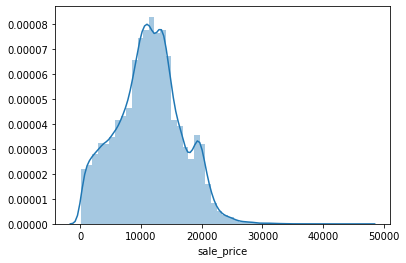

In [15]:
sns.distplot(cars['sale_price']);

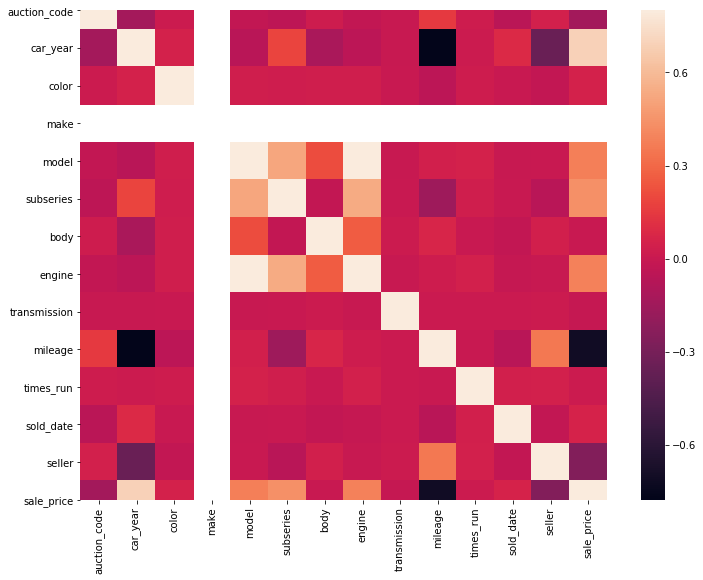

In [16]:
#correlation matrix
corrmat = cars.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,);

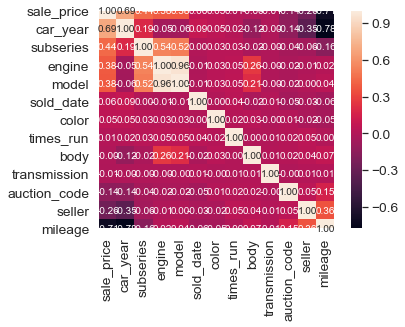

In [17]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sale_price')['sale_price'].index
cm = np.corrcoef(cars[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

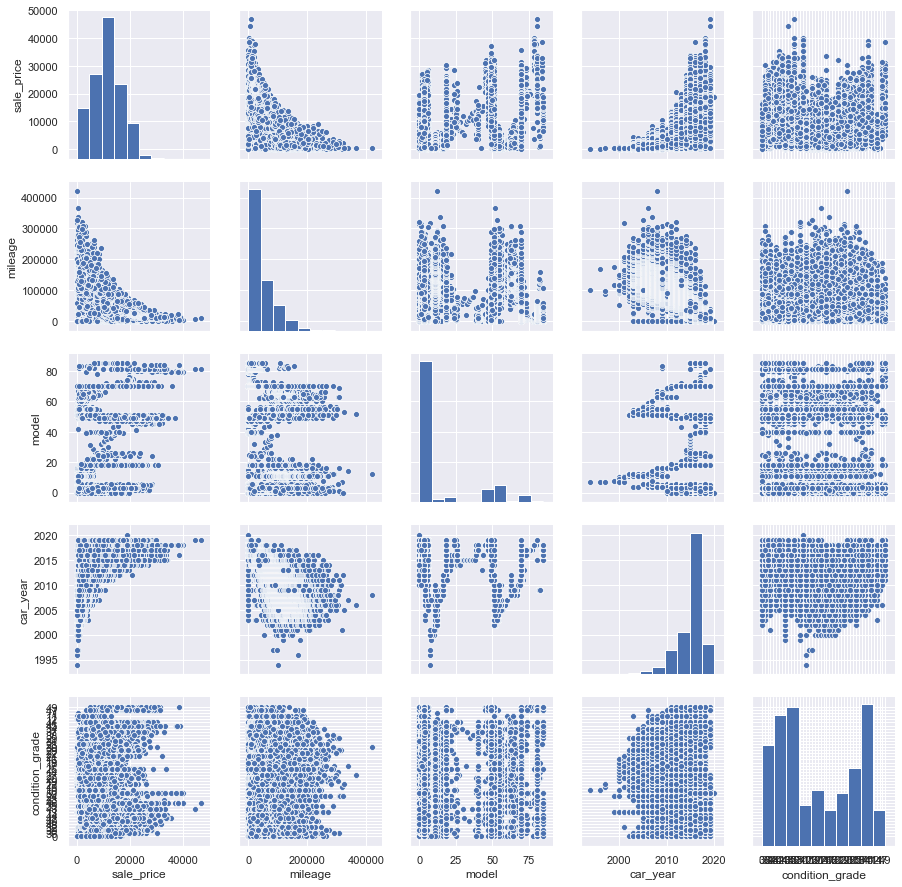

In [18]:
sns.set()
cols = ['sale_price', 'mileage', 'model', 'car_year', 'condition_grade']
sns.pairplot(cars[cols], height = 2.5)
plt.show();

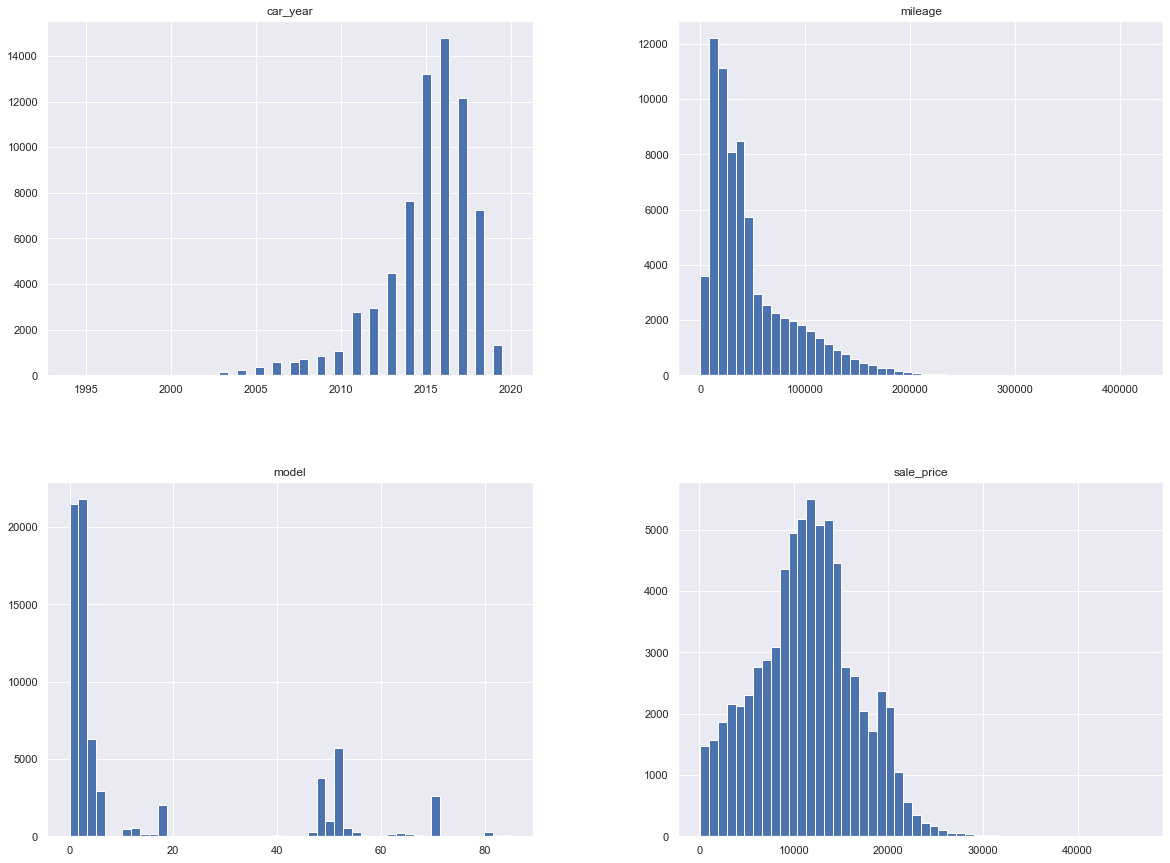

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
cars[['sale_price', 'mileage', 'model', 'car_year', 'condition_grade']].hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [20]:
#applying log transformation
import numpy as np
cars['mileage'] = np.log(cars['mileage'])
cars['car_year'] = np.log(cars['car_year'])

C:\Users\Carso\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# Create the x and y variables
X = cars.drop(['auction_code', 'color', 'make', 'subseries', 'body', 'engine', 'transmission', 'times_run', 'sold_date', 'seller', 'sale_price'], axis = 1)
selectedfeatures = X.columns
print(selectedfeatures)

y = cars['sale_price']

Index(['car_year', 'model', 'mileage', 'condition_grade'], dtype='object')


In [22]:
#Create dummy variables
cars = pd.get_dummies(cars)

## Divide the dataset into train and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [24]:
X_train.head()

,car_year,model,mileage,condition_grade
8967,7.609862,3,9.343647,46
6114,7.609367,3,9.147507,45
5024,7.609862,3,9.040145,10
8216,7.609862,3,9.297710,39
42591,7.608374,16,10.602070,42


In [28]:
cars.dropna(how='all')

,auction_code,car_year,color,make,model,subseries,body,engine,transmission,mileage,...,condition_grade_41,condition_grade_42,condition_grade_43,condition_grade_44,condition_grade_45,condition_grade_46,condition_grade_47,condition_grade_48,condition_grade_49,condition_grade_50
0,0,7.603399,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,7.602401,1,0,1,1,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,2,7.604894,2,0,2,0,2,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,7.603898,3,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,4,7.602900,4,0,1,2,1,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71225,17,7.608871,1,0,16,0,1,1,0,10.638113,...,0,0,0,0,0,0,0,0,0,0
71226,36,7.608871,3,0,16,0,1,1,0,10.673086,...,0,0,0,0,0,0,0,0,0,0
71227,7,7.609862,5,0,4,1,6,1,0,10.929888,...,0,0,0,0,0,0,0,0,0,0
71228,79,7.605890,9,0,22,0,0,0,0,11.309156,...,0,0,0,0,0,0,0,0,0,0


## Apply a linear regression model

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Accuracy Score of Linear regression on train set",reg.score(X_train,y_train))
print("Accuracy Score of Linear regression on test set",reg.score(X_test,y_test))

# create a new column for the predicted salary
#hitters["reg_predict"] = reg.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [13]:
# This part can print out the p-values for the variables

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.OLS(y_train,X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            logPurchase   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.414e+05
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:55:59   Log-Likelihood:            -2.6888e+05
No. Observations:              114994   AIC:                         5.378e+05
Df Residuals:                  114988   BIC:                         5.378e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender              

In [14]:
# Model Evaluation2: Calculate Root Mean Square Error (RMSE)
y_pred = reg.predict(X_test)
reg_mse = mean_squared_error(y_pred, y_test)
reg_rmse = np.sqrt(reg_mse)
print('Liner Regression RMSE: %.4f' % reg_rmse)

Liner Regression RMSE: 0.5903


In [15]:
# Model Evaluation3: Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 0.4484


## Apply a decision tree model

In [16]:
import pydotplus as pdp
from IPython.display import Image

from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor


regrtree = DecisionTreeRegressor(max_depth = 5)
regrtree.fit(X_train, y_train)
print("Accuracy Score of Decision Tree on train set",regrtree.score(X_train,y_train))
print("Accuracy Score of Decision Tree on test set",regrtree.score(X_test,y_test))

hitters["tree_predict"] = regrtree.predict(X)

Accuracy Score of Decision Tree on train set 0.012055210113873227
Accuracy Score of Decision Tree on test set 0.010427068269228679


In [17]:
y_pred_tree = regrtree.predict(X_test)
tree_mse = mean_squared_error(y_pred_tree, y_test)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree RMSE: %.4f' % tree_rmse)

Decision Tree RMSE: 0.5897


In [18]:
# Model Evaluation3: Calculate mean absolute error (MAE)
tree_mae = mean_absolute_error(y_pred_tree, y_test)
print('Decision Tree MAE: %.4f' % tree_mae)

Decision Tree MAE: 0.4474


[('Gender', 0.23613601322350866), ('Age', 0.14409505119980143), ('Occupation', 0.18071363316123917), ('City_Category', 0.379340824985089), ('Stay_In_Current_City_Years', 0.0333684002169686), ('Marital_Status', 0.02634607721339313)]


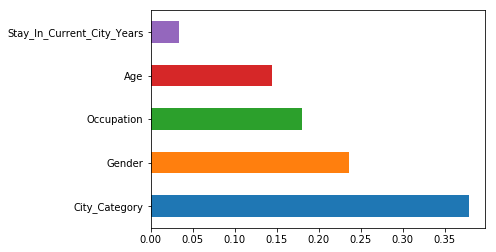

In [19]:
# View a list of the features and their importance scores
print(list(zip(X_train, regrtree.feature_importances_)))

# plot the important features
feat_importances = pd.Series(regrtree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

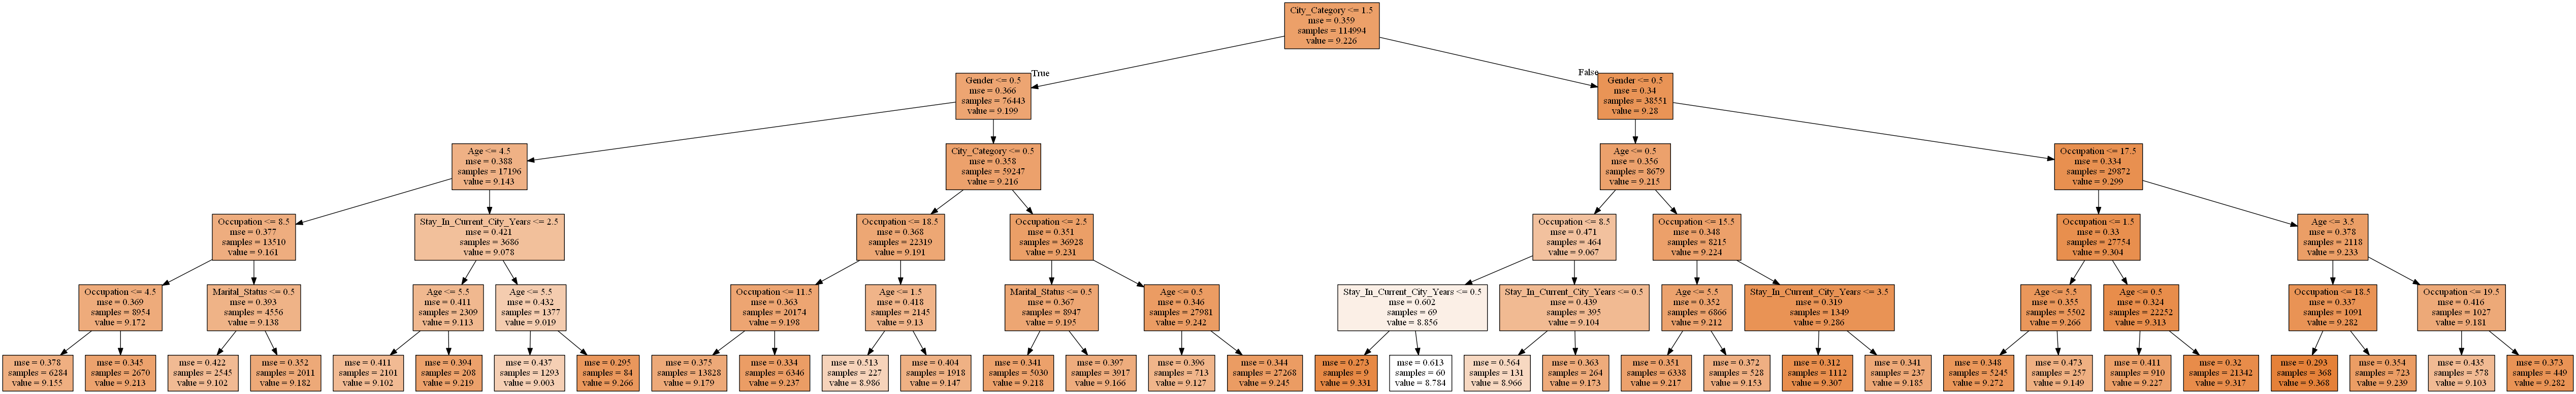

In [20]:
# print out the tree image and the variable importance scores
from sklearn.externals.six import StringIO  
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)


graph = print_tree(regrtree, features=selectedfeatures)
Image(graph.create_png())


## Random forest model

You may also print out the variable importance scores.

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print("Accuracy Score of Random Forests on train set",forest_reg.score(X_train,y_train))
print("Accuracy Score of Random Forests on test set",forest_reg.score(X_test,y_test))

y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred_forest, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

forest_mae = mean_absolute_error(y_pred_forest, y_test)
print('Random Forest MAE: %.4f' % forest_mae)

# you may also print out variable importance scores.

Accuracy Score of Random Forests on train set 0.06257909171561005
Accuracy Score of Random Forests on test set 0.024156652926256905
Random Forest RMSE: 0.5856
Random Forest MAE: 0.4396


[('Gender', 0.03446389495181853), ('Age', 0.2254122996750771), ('Occupation', 0.3351466812450349), ('City_Category', 0.0783990784397566), ('Stay_In_Current_City_Years', 0.23017493619197243), ('Marital_Status', 0.09640310949634047)]


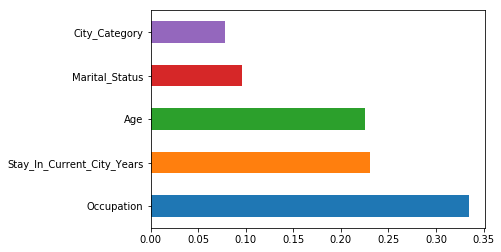

In [22]:
# View a list of the features and their importance scores
print(list(zip(X_train, forest_reg.feature_importances_)))

# plot the important features
feat_importances = pd.Series(forest_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

## Apply a neural network model

In [23]:
# To improve the neural network performance, normalize the input variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [24]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=2000)
mlp.fit(X_train_nn,y_train)
print("Accuracy Score of Neural Network on train set",mlp.score(X_train_nn,y_train))
print("Accuracy Score of Neural Network on test set",mlp.score(X_test_nn,y_test))

hitters["mlp_predict"] = mlp.predict(X)

Accuracy Score of Neural Network on train set -0.0001649277098982882
Accuracy Score of Neural Network on test set -0.004990255175479019


In [25]:
y_pred_mlp = mlp.predict(X_test_nn)
mlp_mse = mean_squared_error(y_pred_mlp, y_test)
mlp_rmse = np.sqrt(mlp_mse)
print('Neural Network RMSE: %.4f' % mlp_rmse)

Neural Network RMSE: 0.5943


In [26]:
# Model Evaluation3: Calculate mean absolute error (MAE)
mlp_mae = mean_absolute_error(y_pred_mlp, y_test)
print('Neural Network MAE: %.4f' % mlp_mae)

Neural Network MAE: 0.4565


According to RMSE, the Decision Tree model yeilds the best prediction. You can also select the best model by R squared or MAE.